# Visualization

In [1]:
from openbabel import pybel
import os
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem.rdMolAlign import AlignMol
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem.Draw.IPythonConsole import drawMol3D

In [2]:
directory = "/home/jpam/google_drive/UFMG/luiz_claudio/tatiane/moleculas/gjf/mol2"
extension = "mol2"
format_file = "mol2"

In [3]:
# Pybel
mols = [list(pybel.readfile(format_file,os.path.join(directory,f)))[0] 
        for f in os.listdir(directory) if f.endswith(extension)]

In [4]:
str_mols = ""
for m in mols:
    str_mols += m.write('smi')
    str_mols += '\n'

In [5]:
# Rdkit
rdmols = []
for m in mols:
    rdmols.append(Chem.MolFromPDBBlock(m.write('pdb'),removeHs=False))

In [6]:
from rdkit.Chem import rdFMCS
res=rdFMCS.FindMCS(rdmols)
res

In [7]:
smartsString = res.smartsString

In [23]:
smartsString

'[#6](-[#1])-,:[#6](:,-[#6]):[#6](:[#6]:[#6]:[#6]-[#1])-[#1]'

In [ ]:
# smartsString = "[#16]1:[#7]:[#6](:[#6]2:[#6]:1:[#6](:[#6]:[#6](:[#6]:2-[#1])-[#1])-[#1])-[#7]1-[#6](-[#1])(-[#1])-[#6](-[#7](-[#6](-[#6]-1(-[#1])-[#1])(-[#1])-[#1])-[#6](-[#6](-[#6](-[#6](-[#1])(-[#1])-[#6](-[#1])-[#1])(-[#6](-[#6](-[#1])-[#1])(-[#1])-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1])(-[#1])-[#1]"

In [8]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [9]:
# Prepare molecules labeling atoms with numbers and generating 2D depictions
for m in rdmols:
    mol_with_atom_index(m)
    AllChem.Compute2DCoords(m)

In [10]:
common_atoms = [m.GetSubstructMatch(Chem.MolFromSmarts(smartsString)) for m in rdmols]

In [12]:
# core = Chem.MolFromSmiles( 'c1ncc2nc[nH]c2n1' )
DrawingOptions.includeAtomNumbers=True
img = Draw.MolsToGridImage(rdmols, 
                           molsPerRow=4, 
                           useSVG=True,subImgSize=(500, 500), 
                           legends=[m.title for m in mols],
                           highlightAtomLists = common_atoms,
                           maxMols=110,
                          )
img

In [13]:
with open(os.path.join(directory,"fig.svg"),'w') as f:
    f.write(img.data)

In [ ]:
Draw.MolsToGridImage(rdmols, 
                     molsPerRow=4, 
                     useSVG=False,
                     subImgSize=(500, 500), 
                     legends=[m.title for m in mols]).save(os.path.join(directory,"fig.png"))

# Prepare alignment

In [14]:
from openbabel import pybel
import os
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem.rdMolAlign import AlignMol
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem.Draw.IPythonConsole import drawMol3D

In [30]:
# SMARTS com padrão dos átomos que serão usados para o alinhamento
# smarts = "*~2~*~*~1~*(~*~*~*~*~1)~*~2"

# smarts = "[#6]-,:[#6](:,-[#6]):[#6](:[#6]:[#6]:[#6])"

smarts = smartsString

patt = Chem.MolFromSmarts(smarts)

directory = "/home/jpam/google_drive/UFMG/luiz_claudio/tatiane/moleculas/gjf/mol2"
extension = "mol2"
format_file = "mol2"

# Pybel
mols = [list(pybel.readfile(format_file,os.path.join(directory,f)))[0] 
        for f in os.listdir(directory) if f.endswith(extension)]

# Rdkit
rdmols = []
for m in mols:
    rdmols.append(Chem.MolFromPDBBlock(m.write('pdb'),removeHs=False))

In [31]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

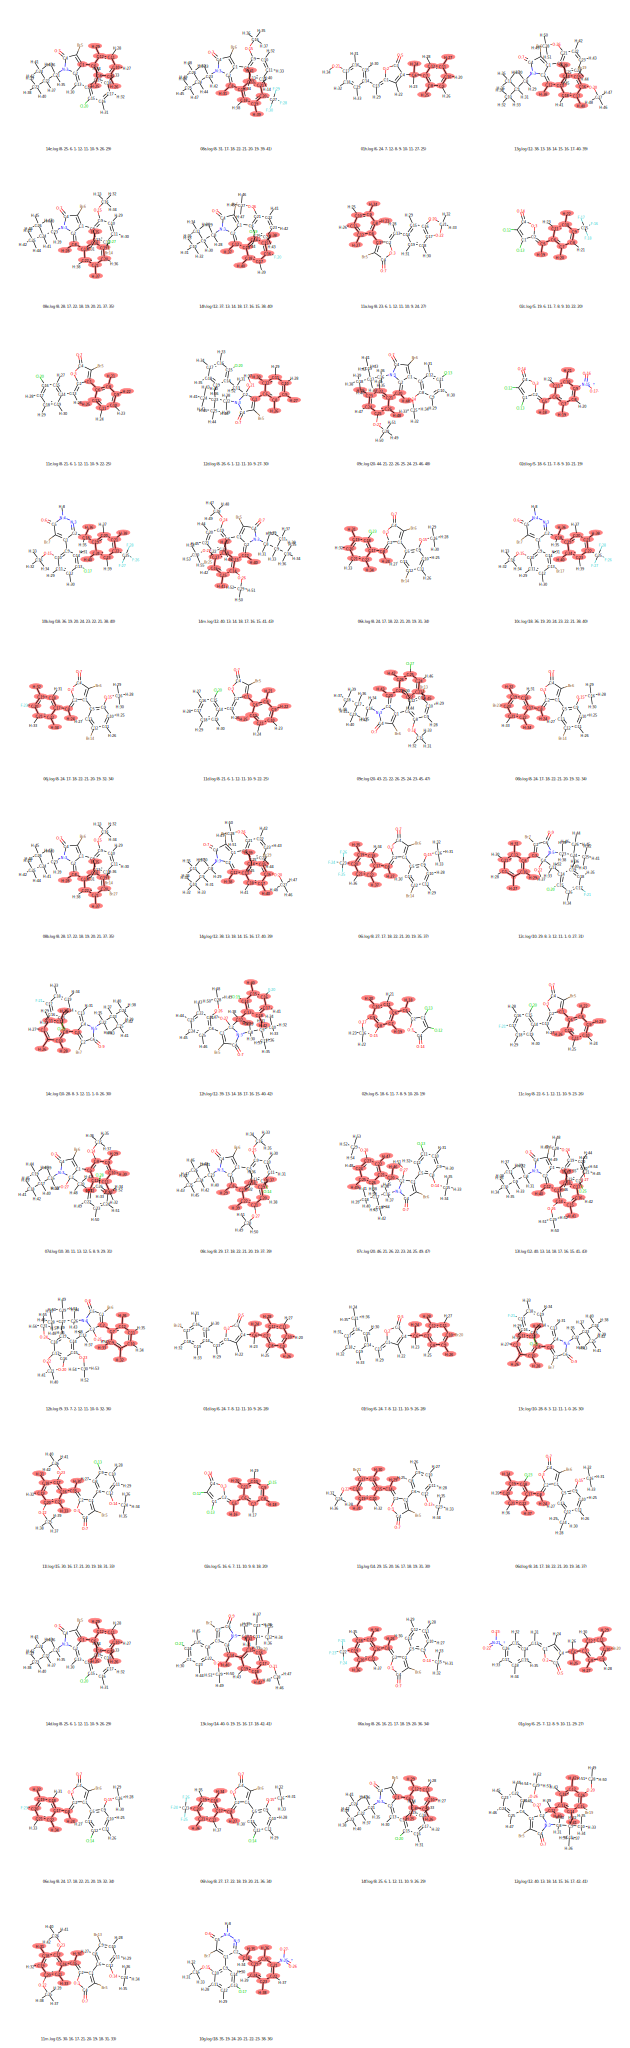

In [32]:
# Prepare molecules labeling atoms with numbers and generating 2D depictions
for m in rdmols:
    mol_with_atom_index(m)
    AllChem.Compute2DCoords(m)

titles = [os.path.basename(m.title) for m in mols]
atoms = [m.GetSubstructMatch(patt) for m in rdmols]
leg = list(a+" "+str(b) for (a,b) in zip(titles,atoms))

img = Draw.MolsToGridImage(rdmols, 
                           molsPerRow=4, 
                           useSVG=True,
                           subImgSize=(500, 500), 
                           highlightAtomLists=[mol.GetSubstructMatch(patt) for mol in rdmols],
                           legends=leg)
img

## Save csv file with alignment

In [33]:
alignment_atoms = [np.array(a)+1 for a in atoms]

df = pd.DataFrame()

l = []
for c in alignment_atoms:
    l.append(','.join([(str(a)) for a in c]))

df["Molecule"] = titles
df["Atoms"] = l

df["Smiles"] = [Chem.MolToSmiles(m) for m in rdmols]

PandasTools.AddMoleculeColumnToFrame(df,'Smiles',molCol='mol',includeFingerprints=True)

df.to_csv(os.path.join(directory,"alinhamentos.csv"),sep=";",index = False,header = False)

# Alignment

In [1]:
from openbabel import pybel
import os
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem.rdMolAlign import AlignMol
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem.Draw.IPythonConsole import drawMol3D

In [13]:
directory = "/home/jpam/google_drive/UFMG/luiz_claudio/tatiane/moleculas/gjf/B3LYP/output/mol2"
arq_align = "alinhamento-x.csv"

df = pd.read_csv(os.path.join(directory,arq_align),sep=";",header = None)

extension = "mol2"
format_file = "mol2"

# Pybel
# mols = [list(pybel.readfile(format_file,os.path.join(directory,f)))[0] 
#         for f in df[0]]

arqs = [f for f in os.listdir(directory) if f.endswith("mol2")]
arqs.sort()

refMol = Chem.MolFromPDBBlock(mols[0].write('pdb'),removeHs=False)
alinhadas = [refMol]

atoms = [[int(a)-1 for a in df[1][j].split(',')] for j in range(len(df[1]))]

refAtoms = atoms[0]
Chem.MolToPDBFile(refMol,filename=mols[0].title[:-len(extension)]+"pdb")

for i in range(1,len(mols)):
    prbMol = Chem.MolFromPDBBlock(mols[i].write('pdb'),removeHs=False)
    prbAtoms = atoms[i]
#     print(prbAtoms)
    alinhamento = AlignMol(prbMol,refMol,atomMap=list(zip(prbAtoms,refAtoms)))
    Chem.MolToPDBFile(prbMol,filename=mols[i].title[:-len(extension)]+"pdb")
    alinhadas.append(prbMol)


AttributeError: 'generator' object has no attribute 'write'

In [9]:
drawMol3D(alinhadas)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [20]:
directory = "/home/jpam/google_drive/UFMG/luiz_claudio/tatiane/moleculas/gjf/B3LYP/output/mol2"
arq_align = "alinhamento-x.csv"

df = pd.read_csv(os.path.join(directory,arq_align),sep=";",header = None)

extension = "mol2"
format_file = "mol2"

mols = [f for f in os.listdir(directory) if f.endswith("mol2")]
mols.sort()

refMol = Chem.MolFromMol2File(os.path.join(directory,mols[0]),removeHs=False)
alinhadas = [refMol]

atoms = [[int(a)-1 for a in df[1][j].split(',')] for j in range(len(df[1]))]

refAtoms = atoms[0]
Chem.MolToPDBFile(refMol,filename=os.path.join(directory,mols[0][:-len(extension)]+"pdb"))

for i in range(1,len(mols)):
    prbMol = Chem.MolFromMol2File(os.path.join(directory,mols[i]),removeHs=False)
    prbAtoms = atoms[i]
#     print(prbAtoms)
    alinhamento = AlignMol(prbMol,refMol,atomMap=list(zip(prbAtoms,refAtoms)))
    Chem.MolToPDBFile(prbMol,filename=os.path.join(directory,mols[i][:-len(extension)]+"pdb"))
    alinhadas.append(prbMol)


In [21]:
drawMol3D(alinhadas)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol